In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib  inline

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

# x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.

# y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.

# x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.

# y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

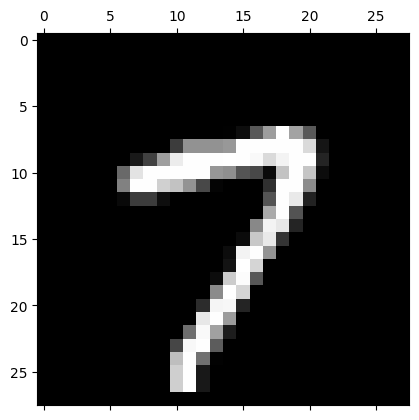

In [36]:
plt.matshow(X_train[103], cmap='gray')

In [37]:
y_train[103]

7

In [38]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [39]:
X_train.shape

(60000, 28, 28)

In [43]:
X_train = X_train / 255;
X_test = X_test / 255;

In [44]:
# Flattening 2D array to 1D array
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened.shape

(60000, 784)

In [45]:
# Flattening 2D array to 1D array for X_test
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [46]:
model = keras.Sequential([
    #dense means all neurons in 1st layer are connected to all the neurons in 2nd layer
    keras.layers.Dense(10,input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8169 - loss: 0.7207
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9145 - loss: 0.3087
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9207 - loss: 0.2818
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9238 - loss: 0.2733
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9273 - loss: 0.2651


In [47]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9146 - loss: 0.3045


[0.2706376314163208, 0.9251999855041504]

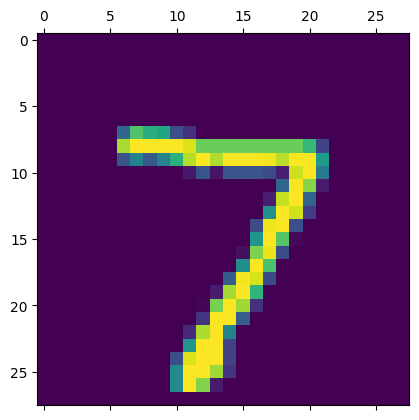

In [50]:
plt.matshow(X_test[0])

In [51]:
y_predicted = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [53]:
print(max(y_predicted[0]))

0.9997532


In [54]:
np.argmax(y_predicted[0])

7

In [57]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [58]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [59]:
# build confusion matrix

conf_mat = tf.math.confusion_matrix(labels=y_test,  predictions=y_predicted_labels)
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    1,    0,    5,    7,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   8,   12,  903,   18,   10,    5,   13,   11,   49,    3],
       [   3,    0,   11,  923,    1,   25,    5,   10,   25,    7],
       [   1,    1,    3,    1,  923,    0,   13,    3,   11,   26],
       [   9,    2,    1,   33,    9,  779,   19,    4,   32,    4],
       [  10,    3,    5,    1,    8,    9,  919,    1,    2,    0],
       [   2,    6,   22,    6,   11,    1,    0,  949,    3,   28],
       [   7,    7,    6,   19,    9,   22,   10,   10,  879,    5],
       [  11,    7,    1,   11,   35,    9,    0,   25,    6,  904]])>

Text(95.72222222222221, 0.5, 'Actual')

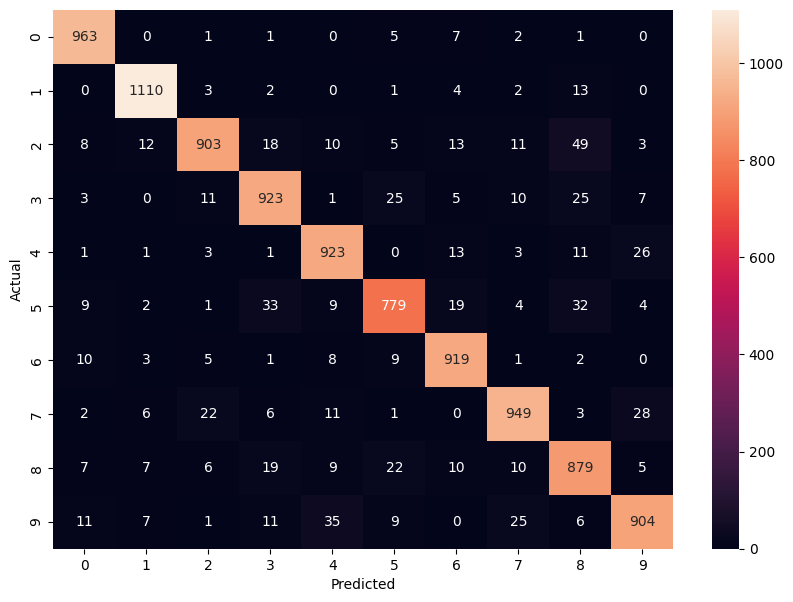

In [64]:
import seaborn as sns

plt.figure(figsize = (10,7))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

### Adding a hidden layer to the model

In [72]:
model = keras.Sequential([
    #dense means all neurons in 1st layer are connected to all the neurons in 2nd layer
    keras.layers.Dense(200,input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=20)

C:\Users\Piyush\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8818 - loss: 0.4036
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9689 - loss: 0.1044
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9798 - loss: 0.0657
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9863 - loss: 0.0460
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9903 - loss: 0.0335
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9920 - loss: 0.0256
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9937 - loss: 0.0204
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9952 - loss: 0.0158
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9960 - loss: 0.0131
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9970 - loss: 0.0098
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9971 - loss: 0.0100
Epoch 12/20
1875/1875 ━━━━━━━━

In [73]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9778 - loss: 0.1256


[0.100465327501297, 0.9818999767303467]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(95.72222222222221, 0.5, 'Actual')

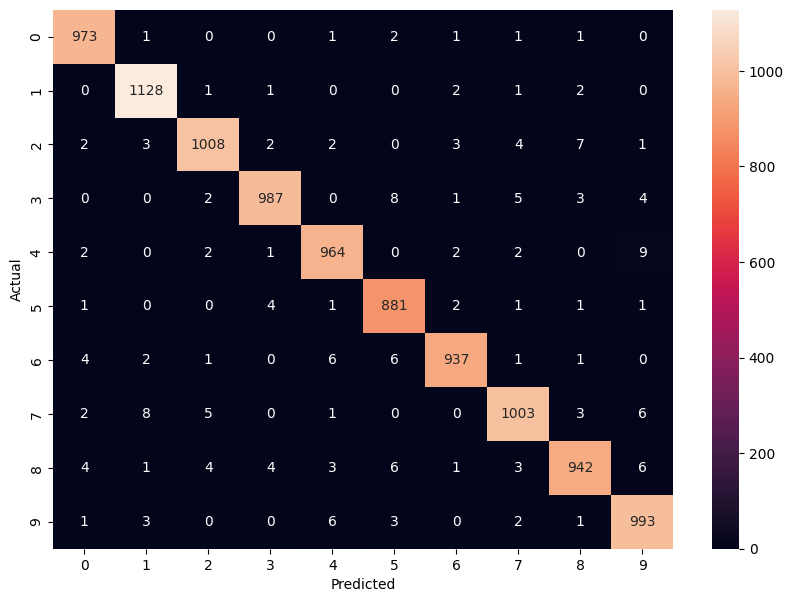

In [75]:
# build confusion matrix
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
conf_mat = tf.math.confusion_matrix(labels=y_test,  predictions=y_predicted_labels)

#plot
import seaborn as sns

plt.figure(figsize = (10,7))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [108]:
#Predicting on a manually handwritten number

from PIL import Image
import numpy as np

img = Image.open("img5.png").convert('L') # Convert to grayscale
img = img.resize((28, 28)) # Resize to 28x28
img

In [109]:
img = np.array(img)
img = 255 - img  # Invert colors

In [104]:
img = img / 255.0 # Normalize to [0,1]
img = img.reshape(1, 28 * 28) # Flatten for a dense model

In [106]:
prediction = model.predict(img)
print("Predicted digit:", np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted digit: 5
